# cell-cell mutation distance heatmap

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
allele_table_a3026 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/trees/a3026_allele_table.csv',header=0,index_col=0,na_filter=False)
allele_table_a3026 = allele_table_a3026[allele_table_a3026['allele']!='None']
allele_table_a3026_rep1 = allele_table_a3026[allele_table_a3026['Sample'].isin(['T3_a3026_1_1'])]

In [4]:
allele_table_a3026_rep1 

,Sample,cellBC,intBC,r1,allele,readCount,UMI,UMI_ratio,lineageGrp
5,T3_a3026_1_1,T3_a3026_1_1_CTACCCAAGGGCTTCC,Rpl39,88:3D,88:3D,289,61,0.398693,9
6,T3_a3026_1_1,T3_a3026_1_1_CTACCCAAGGGCTTCC,Rpl39,87:4D,87:4D,228,53,0.346405,9
8,T3_a3026_1_1,T3_a3026_1_1_CTACCCAAGGGCTTCC,Myl6,84:9D,84:9D,315,38,0.481013,9
10,T3_a3026_1_1,T3_a3026_1_1_CTACCCAAGGGCTTCC,Myl6,90:2D,90:2D,271,28,0.354430,9
12,T3_a3026_1_1,T3_a3026_1_1_CTACCCAAGGGCTTCC,Hsp90ab1,87:1D,87:1D,139,21,0.656250,9
...,...,...,...,...,...,...,...,...,...
497378,T3_a3026_1_1,T3_a3026_1_1_CAATGACCACGAGAAC,Tpt1,92:1D,92:1D,50,9,0.450000,7
497379,T3_a3026_1_1,T3_a3026_1_1_CAATGACCACGAGAAC,Fth1,88:6D,88:6D,28,5,0.555556,7
497380,T3_a3026_1_1,T3_a3026_1_1_CAATGACCACGAGAAC,Hsp90ab1,87:1D,87:1D,11,2,0.666667,7
497382,T3_a3026_1_1,T3_a3026_1_1_CAATGACCACGAGAAC,Fth1,91:6D,91:6D,7,2,0.222222,7


In [5]:
allele_table_a3026_rep1['r1_gene'] = allele_table_a3026_rep1['intBC'] + '_' + allele_table_a3026_rep1['r1']
cell_lineage = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/cell_lineage.T1_T2_T3a.csv',header=0)
cell_lineage.index = cell_lineage.cellBC
cell_lineage

/tmp/ipykernel_358211/1052263724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allele_table_a3026_rep1['r1_gene'] = allele_table_a3026_rep1['intBC'] + '_' + allele_table_a3026_rep1['r1']


,cellBC,lineageGrp
cellBC,,
T2_a3030_2_AACCATGGTCGTCATA,T2_a3030_2_AACCATGGTCGTCATA,1
T2_a3030_2_GGTTAACTCGTAGGAG,T2_a3030_2_GGTTAACTCGTAGGAG,1
T2_a3026_1_CAGGGCTTCTCCACTG,T2_a3026_1_CAGGGCTTCTCCACTG,1
T2_a3030_2_GGTTAACTCTTCGGTC,T2_a3030_2_GGTTAACTCTTCGGTC,1
T2_a3030_2_GGTTCTCCACCACATA,T2_a3030_2_GGTTCTCCACCACATA,1
...,...,...
T1_a3028_TCCGGGATCAGTGTGT,T1_a3028_TCCGGGATCAGTGTGT,143
T1_a3028_GTCTACCCAGGTATGG,T1_a3028_GTCTACCCAGGTATGG,143
T1_a3028_ATTGGGTAGTTACGGG,T1_a3028_ATTGGGTAGTTACGGG,143


In [6]:
cell_mutation_matrix = allele_table_a3026_rep1.pivot(index='cellBC', columns='r1_gene', values='UMI')
cell_mutation_matrix['lineageGrp'] = list(cell_lineage.loc[cell_mutation_matrix.index,'lineageGrp'].astype('str'))
cell_mutation_matrix['lineageGrp'] = pd.Categorical(cell_mutation_matrix['lineageGrp'], categories=cell_mutation_matrix['lineageGrp'].value_counts().index, ordered=True)
cell_mutation_matrix = cell_mutation_matrix.sort_values('lineageGrp')
cell_mutation_matrix = cell_mutation_matrix.iloc[:,0:cell_mutation_matrix.shape[1]-1]
cell_mutation_matrix = cell_mutation_matrix.fillna(0)
cell_mutation_matrix[cell_mutation_matrix >0 ] = 1
cell_mutation_matrix

r1_gene,Btf3_100:14D,Btf3_100:1D,Btf3_100:1I,Btf3_100:2D,Btf3_100:3D,Btf3_100:4D,Btf3_100:5I,Btf3_100:6I,Btf3_100:7I,Btf3_101:18I,...,Tpt1_93:1D,Tpt1_93:1I,Tpt1_93:22D,Tpt1_93:2D,Tpt1_93:2I,Tpt1_93:3D,Tpt1_93:4D,Tpt1_95:13I,Tpt1_95:2D,Tpt1_97:1I
cellBC,,,,,,,,,,,,,,,,,,,,,
T3_a3026_1_1_AAACCCAGTACCGCGT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T3_a3026_1_1_GATGCTAAGTTGCCTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T3_a3026_1_1_GATGATCCAGCTATTG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T3_a3026_1_1_GATGACTTCTAAGAAG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T3_a3026_1_1_GATGACTCAGTTAGAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T3_a3026_1_1_ACTGCAACATGTCGTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T3_a3026_1_1_GAGGCCTGTAGGTGCA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T3_a3026_1_1_AATTTCCGTTCCTAGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
cell_lineage = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/cell_lineage.T1_T2_T3a.csv')
cell_lineage.index = cell_lineage.cellBC
cell_lineage['Time.point'] = [ cellBC.split('_')[0] for cellBC in cell_lineage['cellBC']]
cell_lineage['Sample'] = [ '_'.join(cellBC.split('_')[0:len(cellBC.split('_'))-1]) for cellBC in cell_lineage['cellBC']]
clone_counts = cell_lineage[['Time.point','Sample','lineageGrp']].value_counts().reset_index()
import random
random.seed(0)
color_df = pd.read_csv("/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/color_lineage_dict.csv",sep=',',header=0)
color_dict = dict(zip(list(color_df.iloc[:,0].astype('str')), list(color_df.iloc[:,1])))
color_dict['1'] = '#fa9fb5'

In [8]:
data_colors = [color_dict[str(lineageGrp)] for lineageGrp in list(cell_lineage.loc[cell_mutation_matrix.index,'lineageGrp'].astype('str')) ]


In [16]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

df_array = cell_mutation_matrix.values
distances = cdist(df_array, df_array, metric='hamming')
result = pd.DataFrame(distances, index=cell_mutation_matrix.index, columns=cell_mutation_matrix.index)

In [17]:
import matplotlib.pyplot as plt

In [18]:
result

cellBC,T3_a3026_1_1_AAACCCAGTACCGCGT,T3_a3026_1_1_GATGCTAAGTTGCCTA,T3_a3026_1_1_GATGATCCAGCTATTG,T3_a3026_1_1_GATGACTTCTAAGAAG,T3_a3026_1_1_GATGACTCAGTTAGAA,T3_a3026_1_1_GATCGTACAGGACATG,T3_a3026_1_1_GATCCCTAGTGTTGTC,T3_a3026_1_1_GATCCCTAGGTCGTGA,T3_a3026_1_1_GATGCTACACGCCAGT,T3_a3026_1_1_GATCAGTTCATCACCC,...,T3_a3026_1_1_AGACACTCAAAGCGTG,T3_a3026_1_1_ACGCACGGTGGCTAGA,T3_a3026_1_1_CAGCGTGTCAGGACGA,T3_a3026_1_1_CCACCATGTTCAGTAC,T3_a3026_1_1_CTAACTTAGCCGATCC,T3_a3026_1_1_ACTGCAACATGTCGTA,T3_a3026_1_1_GAGGCCTGTAGGTGCA,T3_a3026_1_1_AATTTCCGTTCCTAGA,T3_a3026_1_1_GGTTAACTCGGCGATC,T3_a3026_1_1_TTCTTGACATTCAGCA
cellBC,,,,,,,,,,,,,,,,,,,,,
T3_a3026_1_1_AAACCCAGTACCGCGT,0.000000,0.011436,0.008895,0.010165,0.011436,0.007624,0.011436,0.010165,0.011436,0.012706,...,0.020330,0.017789,0.022872,0.024142,0.022872,0.024142,0.017789,0.024142,0.026684,0.017789
T3_a3026_1_1_GATGCTAAGTTGCCTA,0.011436,0.000000,0.010165,0.008895,0.015248,0.006353,0.010165,0.008895,0.005083,0.011436,...,0.021601,0.016518,0.021601,0.022872,0.024142,0.025413,0.019060,0.020330,0.030496,0.019060
T3_a3026_1_1_GATGATCCAGCTATTG,0.008895,0.010165,0.000000,0.008895,0.015248,0.003812,0.010165,0.011436,0.012706,0.011436,...,0.024142,0.019060,0.019060,0.025413,0.026684,0.025413,0.016518,0.025413,0.025413,0.021601
T3_a3026_1_1_GATGACTTCTAAGAAG,0.010165,0.008895,0.008895,0.000000,0.013977,0.007624,0.013977,0.012706,0.006353,0.012706,...,0.022872,0.015248,0.017789,0.024142,0.025413,0.024142,0.015248,0.021601,0.026684,0.020330
T3_a3026_1_1_GATGACTCAGTTAGAA,0.011436,0.015248,0.015248,0.013977,0.000000,0.013977,0.012706,0.016518,0.015248,0.016518,...,0.019060,0.021601,0.021601,0.025413,0.026684,0.025413,0.021601,0.025413,0.033037,0.021601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T3_a3026_1_1_ACTGCAACATGTCGTA,0.024142,0.025413,0.025413,0.024142,0.025413,0.024142,0.025413,0.024142,0.025413,0.029225,...,0.029225,0.031766,0.034307,0.033037,0.034307,0.000000,0.026684,0.038119,0.043202,0.024142
T3_a3026_1_1_GAGGCCTGTAGGTGCA,0.017789,0.019060,0.016518,0.015248,0.021601,0.017789,0.019060,0.017789,0.019060,0.020330,...,0.027954,0.022872,0.027954,0.029225,0.030496,0.026684,0.000000,0.031766,0.036849,0.022872
T3_a3026_1_1_AATTTCCGTTCCTAGA,0.024142,0.020330,0.025413,0.021601,0.025413,0.021601,0.022872,0.024142,0.017789,0.024142,...,0.029225,0.029225,0.031766,0.033037,0.039390,0.038119,0.031766,0.000000,0.043202,0.031766


<Figure size 600x600 with 0 Axes>

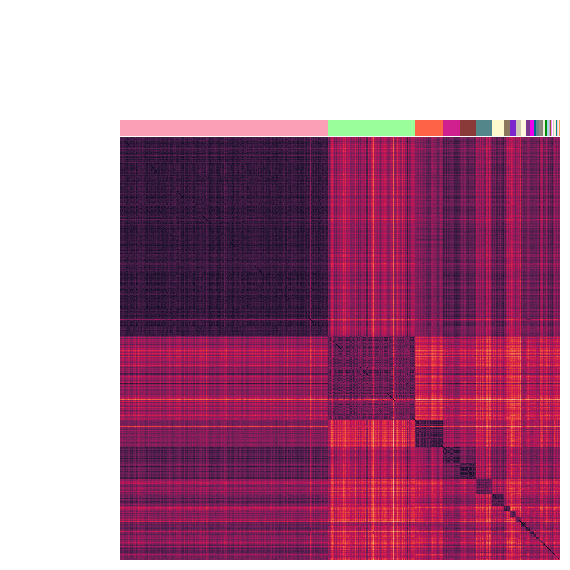

In [19]:
plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(6, 6)
g = sns.clustermap(result,row_cluster=False,col_cluster=False,yticklabels=False,xticklabels=False,col_colors=data_colors,figsize=[6,6])
g.ax_heatmap.set_xlabel('')  
g.ax_heatmap.set_ylabel('') 
g.cax.set_visible(False)

plt.savefig('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure2.sup/cell_mutation_distance_heatmap_T3_a3026_1_1.png',dpi=300)
plt.show()

In [9]:
allele_table_a3026 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/trees/a3026_allele_table.csv',header=0,index_col=0,na_filter=False)
allele_table_a3026 = allele_table_a3026[allele_table_a3026['allele']!='None']
allele_table_a3026_rep1 = allele_table_a3026[allele_table_a3026['Sample'].isin(['T1_a3026'])]

In [10]:
allele_table_a3026_rep1['r1_gene'] = allele_table_a3026_rep1['intBC'] + '_' + allele_table_a3026_rep1['r1']
cell_lineage = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/cell_lineage.T1_T2_T3a.csv',header=0)
cell_lineage.index = cell_lineage.cellBC
cell_lineage

/tmp/ipykernel_358211/1052263724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allele_table_a3026_rep1['r1_gene'] = allele_table_a3026_rep1['intBC'] + '_' + allele_table_a3026_rep1['r1']


,cellBC,lineageGrp
cellBC,,
T2_a3030_2_AACCATGGTCGTCATA,T2_a3030_2_AACCATGGTCGTCATA,1
T2_a3030_2_GGTTAACTCGTAGGAG,T2_a3030_2_GGTTAACTCGTAGGAG,1
T2_a3026_1_CAGGGCTTCTCCACTG,T2_a3026_1_CAGGGCTTCTCCACTG,1
T2_a3030_2_GGTTAACTCTTCGGTC,T2_a3030_2_GGTTAACTCTTCGGTC,1
T2_a3030_2_GGTTCTCCACCACATA,T2_a3030_2_GGTTCTCCACCACATA,1
...,...,...
T1_a3028_TCCGGGATCAGTGTGT,T1_a3028_TCCGGGATCAGTGTGT,143
T1_a3028_GTCTACCCAGGTATGG,T1_a3028_GTCTACCCAGGTATGG,143
T1_a3028_ATTGGGTAGTTACGGG,T1_a3028_ATTGGGTAGTTACGGG,143


In [11]:
cell_mutation_matrix = allele_table_a3026_rep1.pivot(index='cellBC', columns='r1_gene', values='UMI')
cell_mutation_matrix['lineageGrp'] = list(cell_lineage.loc[cell_mutation_matrix.index,'lineageGrp'].astype('str'))
cell_mutation_matrix['lineageGrp'] = pd.Categorical(cell_mutation_matrix['lineageGrp'], categories=cell_mutation_matrix['lineageGrp'].value_counts().index, ordered=True)
cell_mutation_matrix = cell_mutation_matrix.sort_values('lineageGrp')
cell_mutation_matrix = cell_mutation_matrix.iloc[:,0:cell_mutation_matrix.shape[1]-1]
cell_mutation_matrix = cell_mutation_matrix.fillna(0)
cell_mutation_matrix[cell_mutation_matrix >0 ] = 1
cell_mutation_matrix

r1_gene,Acta1_89:1D,Btf3_100:10D,Btf3_100:2D,Btf3_100:3I,Btf3_100:5I,Btf3_100:7D,Btf3_100:7I,Btf3_101:1I,Btf3_102:6I,Btf3_106:6I,...,Tpt1_93:7I,Tpt1_93:9I,Tpt1_94:1I,Tpt1_94:3I,Tpt1_94:4D,Tpt1_96:1D,Tpt1_97:13I,Tpt1_97:20D,Tpt1_97:21I,Tpt1_98:11I
cellBC,,,,,,,,,,,,,,,,,,,,,
T1_a3026_TGCTTCGAGTCGGGAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1_a3026_GTCGTAAAGACGATAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1_a3026_GTCGCGACAAATGAAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1_a3026_AGGATCTTCGTACACA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1_a3026_AGGCTGCCAGAGGCTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T1_a3026_GGGTCTGCACACACTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1_a3026_TACAACGAGCTCCGAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1_a3026_TCCCATGAGCGCCCAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
import pandas as pd
import seaborn as sns

In [13]:
cell_lineage

,cellBC,lineageGrp
cellBC,,
T2_a3030_2_AACCATGGTCGTCATA,T2_a3030_2_AACCATGGTCGTCATA,1
T2_a3030_2_GGTTAACTCGTAGGAG,T2_a3030_2_GGTTAACTCGTAGGAG,1
T2_a3026_1_CAGGGCTTCTCCACTG,T2_a3026_1_CAGGGCTTCTCCACTG,1
T2_a3030_2_GGTTAACTCTTCGGTC,T2_a3030_2_GGTTAACTCTTCGGTC,1
T2_a3030_2_GGTTCTCCACCACATA,T2_a3030_2_GGTTCTCCACCACATA,1
...,...,...
T1_a3028_TCCGGGATCAGTGTGT,T1_a3028_TCCGGGATCAGTGTGT,143
T1_a3028_GTCTACCCAGGTATGG,T1_a3028_GTCTACCCAGGTATGG,143
T1_a3028_ATTGGGTAGTTACGGG,T1_a3028_ATTGGGTAGTTACGGG,143


In [14]:
cell_lineage = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/cell_lineage.T1_T2_T3a.csv')
cell_lineage.index = cell_lineage.cellBC
cell_lineage['Time.point'] = [ cellBC.split('_')[0] for cellBC in cell_lineage['cellBC']]
cell_lineage['Sample'] = [ '_'.join(cellBC.split('_')[0:len(cellBC.split('_'))-1]) for cellBC in cell_lineage['cellBC']]
clone_counts = cell_lineage[['Time.point','Sample','lineageGrp']].value_counts().reset_index()
import random
random.seed(0)
color_df = pd.read_csv("/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/color_lineage_dict.csv",sep=',',header=0)
color_dict = dict(zip(list(color_df.iloc[:,0].astype('str')), list(color_df.iloc[:,1])))
color_dict['1'] = '#fa9fb5'

In [15]:
data_colors = [color_dict[str(lineageGrp)] for lineageGrp in list(cell_lineage.loc[cell_mutation_matrix.index,'lineageGrp'].astype('str')) ]

In [27]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

df_array = cell_mutation_matrix.values

distances = cdist(df_array, df_array, metric='hamming')
result = pd.DataFrame(distances, index=cell_mutation_matrix.index, columns=cell_mutation_matrix.index)

In [28]:
result

cellBC,T1_a3026_TGCTTCGAGTCGGGAT,T1_a3026_GTCGTAAAGACGATAT,T1_a3026_GTCGCGACAAATGAAC,T1_a3026_AGGATCTTCGTACACA,T1_a3026_AGGCTGCCAGAGGCTA,T1_a3026_GTCCACTAGTAGCATA,T1_a3026_AGGGAGTTCGAGATGG,T1_a3026_GTCATGATCCAGGACC,T1_a3026_TGTGATGCAGGTACGA,T1_a3026_AGGGCTCCATCACAGT,...,T1_a3026_ATCGGATAGTTGGCTT,T1_a3026_ACACCAACATACGCAT,T1_a3026_AGGCTGCTCCATTTCA,T1_a3026_GCCAGCACACCGTGCA,T1_a3026_GCTGAATGTTTGCCGG,T1_a3026_GGGTCTGCACACACTA,T1_a3026_TACAACGAGCTCCGAC,T1_a3026_TCCCATGAGCGCCCAT,T1_a3026_TGAATGCGTCGGAAAC,T1_a3026_TGGGATTGTCTCTCCA
cellBC,,,,,,,,,,,,,,,,,,,,,
T1_a3026_TGCTTCGAGTCGGGAT,0.000000,0.014138,0.012253,0.012724,0.016023,0.016494,0.012724,0.011781,0.013666,0.010368,...,0.019793,0.017436,0.017436,0.012724,0.017436,0.015080,0.016023,0.021678,0.016023,0.016965
T1_a3026_GTCGTAAAGACGATAT,0.014138,0.000000,0.007540,0.006126,0.009425,0.012724,0.007069,0.007069,0.008011,0.008483,...,0.013195,0.012724,0.012724,0.007069,0.012724,0.010368,0.013195,0.016023,0.013195,0.015080
T1_a3026_GTCGCGACAAATGAAC,0.012253,0.007540,0.000000,0.006126,0.006598,0.010839,0.005184,0.005184,0.006126,0.004713,...,0.010368,0.008954,0.008954,0.005184,0.009896,0.007540,0.010368,0.015080,0.009425,0.011310
T1_a3026_AGGATCTTCGTACACA,0.012724,0.006126,0.006126,0.000000,0.007069,0.011310,0.004713,0.005655,0.007540,0.006126,...,0.012724,0.010368,0.010368,0.005655,0.012253,0.008954,0.009896,0.015551,0.010839,0.012724
T1_a3026_AGGCTGCCAGAGGCTA,0.016023,0.009425,0.006598,0.007069,0.000000,0.011781,0.007069,0.007069,0.008011,0.008483,...,0.012253,0.010839,0.009896,0.006126,0.013666,0.009425,0.010368,0.015080,0.011310,0.012253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T1_a3026_GGGTCTGCACACACTA,0.015080,0.010368,0.007540,0.008954,0.009425,0.011781,0.008011,0.008011,0.008954,0.008483,...,0.011310,0.012724,0.012724,0.007069,0.010839,0.000000,0.011310,0.015080,0.012253,0.013195
T1_a3026_TACAACGAGCTCCGAC,0.016023,0.013195,0.010368,0.009896,0.010368,0.014609,0.008954,0.010839,0.009896,0.011310,...,0.015080,0.013666,0.011781,0.008954,0.013666,0.011310,0.000000,0.016965,0.013195,0.013195
T1_a3026_TCCCATGAGCGCCCAT,0.021678,0.016023,0.015080,0.015551,0.015080,0.017436,0.014609,0.013666,0.015551,0.015080,...,0.017908,0.017436,0.017436,0.011781,0.017436,0.015080,0.016965,0.000000,0.016023,0.019793


In [29]:
len(data_colors)

5180

<Figure size 600x600 with 0 Axes>

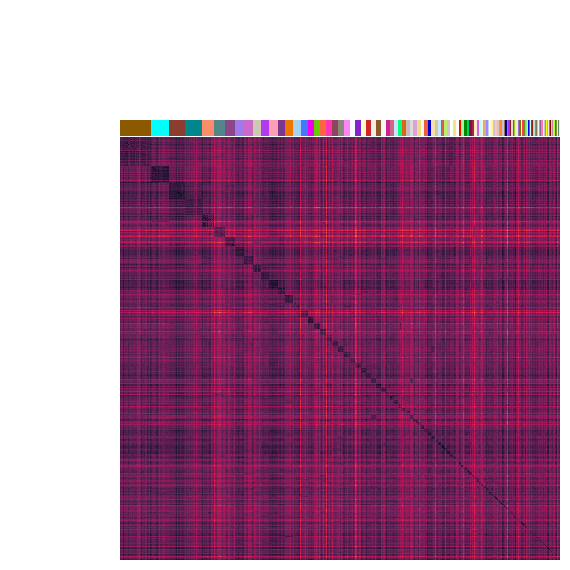

In [30]:
plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(6, 6)
g = sns.clustermap(result,row_cluster=False,col_cluster=False,yticklabels=False,xticklabels=False,col_colors=data_colors,figsize=[6,6])
g.ax_heatmap.set_xlabel('')  
g.ax_heatmap.set_ylabel('') 
g.cax.set_visible(False)

plt.savefig('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure2.sup/cell_mutation_distance_heatmap_T1_a3026.png',dpi=300)
plt.show()

/tmp/ipykernel_357548/4292982144.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allele_table_a3026_rep1['r1_gene'] = allele_table_a3026_rep1['intBC'] + '_' + allele_table_a3026_rep1['r1']


<Figure size 600x600 with 0 Axes>

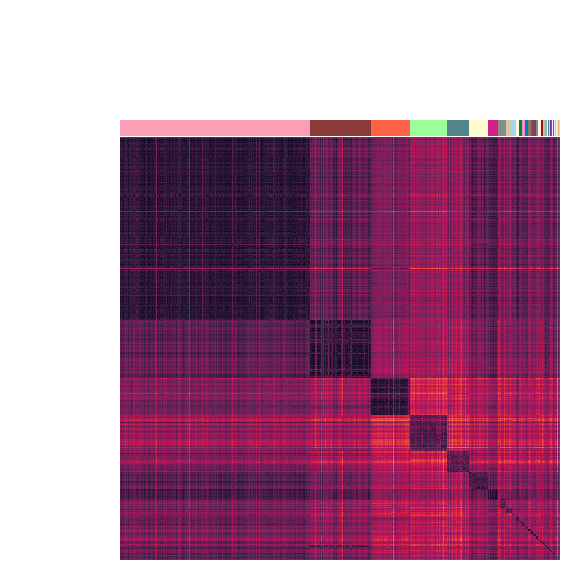

In [31]:
allele_table_a3026 = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/trees/a3026_allele_table.csv',header=0,index_col=0,na_filter=False)
allele_table_a3026 = allele_table_a3026[allele_table_a3026['allele']!='None']
allele_table_a3026_rep1 = allele_table_a3026[allele_table_a3026['Sample'].isin(['T2_a3026_1'])]

allele_table_a3026_rep1['r1_gene'] = allele_table_a3026_rep1['intBC'] + '_' + allele_table_a3026_rep1['r1']
cell_lineage = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/cell_lineage.T1_T2_T3a.csv',header=0)
cell_lineage.index = cell_lineage.cellBC

cell_mutation_matrix = allele_table_a3026_rep1.pivot(index='cellBC', columns='r1_gene', values='UMI')
cell_mutation_matrix['lineageGrp'] = list(cell_lineage.loc[cell_mutation_matrix.index,'lineageGrp'].astype('str'))
cell_mutation_matrix['lineageGrp'] = pd.Categorical(cell_mutation_matrix['lineageGrp'], categories=cell_mutation_matrix['lineageGrp'].value_counts().index, ordered=True)
cell_mutation_matrix = cell_mutation_matrix.sort_values('lineageGrp')
cell_mutation_matrix = cell_mutation_matrix.iloc[:,0:cell_mutation_matrix.shape[1]-1]
cell_mutation_matrix = cell_mutation_matrix.fillna(0)
cell_mutation_matrix[cell_mutation_matrix >0 ] = 1

cell_lineage = pd.read_csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/cell_lineage.T1_T2_T3a.csv')
cell_lineage.index = cell_lineage.cellBC
cell_lineage['Time.point'] = [ cellBC.split('_')[0] for cellBC in cell_lineage['cellBC']]
cell_lineage['Sample'] = [ '_'.join(cellBC.split('_')[0:len(cellBC.split('_'))-1]) for cellBC in cell_lineage['cellBC']]
clone_counts = cell_lineage[['Time.point','Sample','lineageGrp']].value_counts().reset_index()
import random
random.seed(0)
color_df = pd.read_csv("/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/color_lineage_dict.csv",sep=',',header=0)
color_dict = dict(zip(list(color_df.iloc[:,0].astype('str')), list(color_df.iloc[:,1])))
color_dict['1'] = '#fa9fb5'

data_colors = [color_dict[str(lineageGrp)] for lineageGrp in list(cell_lineage.loc[cell_mutation_matrix.index,'lineageGrp'].astype('str')) ]
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist

df_array = cell_mutation_matrix.values
distances = cdist(df_array, df_array, metric='hamming')
result = pd.DataFrame(distances, index=cell_mutation_matrix.index, columns=cell_mutation_matrix.index)

plt.rcParams['pdf.fonttype'] = 42
plt.gcf().set_size_inches(6, 6)
g = sns.clustermap(result,row_cluster=False,col_cluster=False,yticklabels=False,xticklabels=False,col_colors=data_colors,figsize=[6,6])
g.ax_heatmap.set_xlabel('')  
g.ax_heatmap.set_ylabel('') 
g.cax.set_visible(False)

plt.savefig('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure2.sup/cell_mutation_distance_heatmap_T2_a3026_1.png',dpi=300)
plt.show()

In [32]:
result

cellBC,T2_a3026_1_GGGAGTACAGATCCAT,T2_a3026_1_TCCCATGCACTGGCGT,T2_a3026_1_CATGGATAGTCAAGCG,T2_a3026_1_GTCGAATAGGTAGACC,T2_a3026_1_CATGGATCAGCCTTCT,T2_a3026_1_GAGATGGGTACAAAGT,T2_a3026_1_TCCCAGTTCATTCATC,T2_a3026_1_TCCCAGTGTTTCGATG,T2_a3026_1_TCCCATGGTACTGCGC,T2_a3026_1_CATGGTAAGCACGATG,...,T2_a3026_1_AGAAGCGGTTAGGGTG,T2_a3026_1_GGAGATGGTCACCGCA,T2_a3026_1_GTAGTACAGGTCGTGA,T2_a3026_1_GATGATCTCATTTGTC,T2_a3026_1_GTGTTCCAGATACATG,T2_a3026_1_AATGACCGTCTACGAT,T2_a3026_1_ATACCTTCACGAAGAC,T2_a3026_1_CATCGTCTCGCAATGT,T2_a3026_1_AGGACGATCATTCACT,T2_a3026_1_TGGTTAGTCTGAATGC
cellBC,,,,,,,,,,,,,,,,,,,,,
T2_a3026_1_GGGAGTACAGATCCAT,0.000000,0.007313,0.007313,0.008227,0.002742,0.007313,0.003656,0.005484,0.006399,0.004570,...,0.010055,0.008227,0.015539,0.014625,0.021024,0.008227,0.012797,0.018282,0.007313,0.007313
T2_a3026_1_TCCCATGCACTGGCGT,0.007313,0.000000,0.007313,0.004570,0.008227,0.007313,0.005484,0.007313,0.011883,0.008227,...,0.010055,0.008227,0.017367,0.016453,0.022852,0.011883,0.016453,0.021938,0.009141,0.010969
T2_a3026_1_CATGGATAGTCAAGCG,0.007313,0.007313,0.000000,0.004570,0.006399,0.007313,0.005484,0.005484,0.008227,0.006399,...,0.011883,0.008227,0.017367,0.018282,0.022852,0.013711,0.016453,0.020110,0.009141,0.010969
T2_a3026_1_GTCGAATAGGTAGACC,0.008227,0.004570,0.004570,0.000000,0.007313,0.002742,0.004570,0.006399,0.009141,0.007313,...,0.010969,0.007313,0.016453,0.017367,0.021938,0.012797,0.015539,0.019196,0.008227,0.010055
T2_a3026_1_CATGGATCAGCCTTCT,0.002742,0.008227,0.006399,0.007313,0.000000,0.006399,0.004570,0.006399,0.005484,0.005484,...,0.010969,0.009141,0.014625,0.015539,0.021938,0.009141,0.015539,0.019196,0.008227,0.010055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T2_a3026_1_AATGACCGTCTACGAT,0.008227,0.011883,0.013711,0.012797,0.009141,0.011883,0.008227,0.011883,0.010969,0.010969,...,0.014625,0.010969,0.018282,0.015539,0.023766,0.000000,0.019196,0.021024,0.010055,0.010055
T2_a3026_1_ATACCTTCACGAAGAC,0.012797,0.016453,0.016453,0.015539,0.015539,0.016453,0.012797,0.016453,0.017367,0.015539,...,0.019196,0.015539,0.024680,0.023766,0.030165,0.019196,0.000000,0.027422,0.014625,0.014625
T2_a3026_1_CATCGTCTCGCAATGT,0.018282,0.021938,0.020110,0.019196,0.019196,0.018282,0.018282,0.020110,0.019196,0.021024,...,0.026508,0.021024,0.028336,0.029250,0.031993,0.021024,0.027422,0.000000,0.020110,0.020110
